In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [2]:
csv_path = '../Data/'

market = pd.read_csv(f'{csv_path}estaticos_market.csv', index_col='Unnamed: 0')
port1 = pd.read_csv(f'{csv_path}estaticos_portfolio1.csv', index_col='Unnamed: 0')
port2 = pd.read_csv(f'{csv_path}estaticos_portfolio2.csv', index_col='Unnamed: 0')
port3 = pd.read_csv(f'{csv_path}estaticos_portfolio3.csv', index_col='Unnamed: 0')

In [3]:
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

In [4]:
port1.head(2)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,False,False,True,False,2018-03-06,False,False,False,NAO,C

In [5]:
port2.head(2)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...


In [6]:
port3.head(2)

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...


In [7]:
print(f'Market: {market.shape}')
print(f'Portfolio 1 {port1.shape}')
print(f'Portfolio 2: {port2.shape}')
print(f'Portfolio 3: {port3.shape}')

Market: (462298, 181)
Portfolio 1 (555, 181)
Portfolio 2: (566, 1)
Portfolio 3: (265, 1)


In [8]:
port2 = port2.merge(market,on='id')
port3 = port3.merge(market,on='id')

### DataFrame Auxiliar

In [9]:
aux = pd.DataFrame({'tipo': market.dtypes,
                    'missing': market.isna().sum(),
                    'size':market.shape[0],
                    'unicos': market.nunique()},index = market.columns)
aux['percentual'] = round(1 - (aux['missing'] / aux['size']),2)

In [10]:
aux.sort_values('percentual',ascending=False)

,tipo,missing,size,unicos,percentual
id,object,0,462298,462298,1.00
fl_email,bool,0,462298,2,1.00
fl_matriz,bool,0,462298,2,1.00
fl_passivel_iss,object,1927,462298,2,1.00
fl_simples_irregular,object,1927,462298,2,1.00
sg_uf_matriz,object,1939,462298,27,1.00
vl_total_veiculos_leves_grupo,float64,1927,462298,310,1.00
vl_total_veiculos_pesados_grupo,float64,1927,462298,296,1.00
fl_veiculo,object,1927,462298,2,1.00
fl_antt,object,1927,462298,2,1.00


### Describe

In [11]:
market.describe()

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,417022.000000,2.419000e+04,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,3251.000000,195115.000000,145029.000000,6743.000000,0.0,0.0,0.0,0.0,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.0,65391.000000,65391.000000,65391.000000,65147.000000,65147.000000,65147.000000,136.000000,136.000000,136.000000,65391.000000,65391.000000,6539

In [12]:
market[market['vl_faturamento_estimado_aux'] > 100000000].shape

(349, 181)

In [13]:
port1.describe()

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,555.000000,0.0,0.0,38.000000,38.000000,4.000000,555.000000,555.000000,0.0,0.0,3.0,508.000000,31.000000,405.000000,408.000000,408.000000,408.000000,362.000000,362.000000,362.000000,360.000000,7.0,198.000000,190.000000,4.00,0.0,0.0,0.0,0.0,2.000000,2.0,2.0,2.0,2.0,2.000000,2.000000,2.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.0,63.0,63.000000,63.000000,63.000000,62.000000,62.000000,62.000000,0.0,0.0,0.0,63.000000,63.0,63.0,63.000000,63.0,63.000000,63.0,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,46.000000,46.000000,46.000000,46.000000,46.000000,3.700000e+01,3.700000e+01,3.700000e+01

### Missing Values:

In [14]:
null_perc = market.isnull().sum().sort_values()/462298
(null_perc > 0.75).sum()

129

### Duplicated rows:

In [15]:
market.duplicated().sum()

0

#### Podemos observar alta correlação entre as 2 features de natureza jurídica:

In [16]:
market['de_natureza_juridica'].value_counts()[:10]

EMPRESARIO INDIVIDUAL                                                     295756
SOCIEDADE EMPRESARIA LIMITADA                                              91231
ASSOCIACAO PRIVADA                                                         29694
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA     15183
ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO                                  7301
ORGANIZACAO RELIGIOSA                                                       2908
SOCIEDADE ANONIMA FECHADA                                                   2196
CONDOMINIO EDILICIO                                                         2084
ENTIDADE SINDICAL                                                           1763
CANDIDATO A CARGO POLITICO ELETIVO                                          1617
Name: de_natureza_juridica, dtype: int64

In [17]:
market['natureza_juridica_macro'].value_counts()

OUTROS                            320211
ENTIDADES EMPRESARIAIS             99241
ENTIDADES SEM FINS LUCRATIVOS      37089
ADMINISTRACAO PUBLICA               2912
CARGO POLITICO                      1617
PESSOAS FISICAS                     1225
INSTITUICOES EXTRATERRITORIAIS         3
Name: natureza_juridica_macro, dtype: int64

#### O mesmo pode ser observado nestas features de ramo e setor:

In [18]:
market['de_ramo'].value_counts()

COMERCIO VAREJISTA                                   172404
SERVICOS DIVERSOS                                     60318
SERVICOS DE ALOJAMENTO/ALIMENTACAO                    30180
INDUSTRIA DA CONSTRUCAO                               25363
COMERCIO E REPARACAO DE VEICULOS                      22356
SERVICOS ADMINISTRATIVOS                              21326
BENS DE CONSUMO                                       21227
SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS        17371
COMERCIO POR ATACADO                                  16464
TRANSPORTE, ARMAZENAGEM E CORREIO                     15485
SERVICOS DE EDUCACAO                                  11311
SERVICOS DE SAUDE                                      9788
CULTURA, ESPORTE E RECREACAO                           5503
SIDERURGICA-METALURGIA                                 3700
TELECOM                                                3626
PRODUTOS DE AGROPECUARIA                               3247
QUIMICA-PETROQUIMICA                    

In [19]:
market['setor'].value_counts()

COMERCIO            211224
SERVIÇO             189644
INDUSTRIA            30893
CONSTRUÇÃO CIVIL     25363
AGROPECUARIA          3247
Name: setor, dtype: int64

#### Divisão e seguimento:

In [20]:
market['nm_divisao'].value_counts()

COMERCIO VAREJISTA                                                                                                          172404
ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS                                                                                      37984
ALIMENTACAO                                                                                                                  27540
COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS                                                                  22356
COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTORES E MOTOCICLETAS                                                              16464
OUTRAS ATIVIDADES DE SERVICOS PESSOAIS                                                                                       15875
SERVICOS ESPECIALIZADOS PARA CONSTRUCAO                                                                                      14291
TRANSPORTE TERRESTRE                                                               

In [21]:
market['nm_segmento'].value_counts()

COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS           211224
OUTRAS ATIVIDADES DE SERVICOS                                         59561
INDUSTRIAS DE TRANSFORMACAO                                           31968
ALOJAMENTO E ALIMENTACAO                                              30180
CONSTRUCAO                                                            25363
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES                  21326
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                       17371
TRANSPORTE ARMAZENAGEM E CORREIO                                      15485
EDUCACAO                                                              11311
SAUDE HUMANA E SERVICOS SOCIAIS                                       10139
ARTES CULTURA ESPORTE E RECREACAO                                      5503
INFORMACAO E COMUNICACAO                                               5475
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS              3287
AGRICULTURA 

#### E em meso_região e micro_regiao

In [22]:
market['nm_meso_regiao'].value_counts()

CENTRO AMAZONENSE         71469
NORTE MARANHENSE          61331
LESTE POTIGUAR            58762
CENTRO NORTE PIAUIENSE    42244
OESTE MARANHENSE          26796
OESTE POTIGUAR            20860
LESTE MARANHENSE          17651
VALE DO ACRE              16539
CENTRO MARANHENSE         13755
SUDOESTE PIAUIENSE        12180
NORTE PIAUIENSE           11919
CENTRAL POTIGUAR          10681
SUDESTE PIAUIENSE         10049
AGRESTE POTIGUAR           7845
SUL MARANHENSE             7382
SUL AMAZONENSE             4931
VALE DO JURUA              3900
SUDOESTE AMAZONENSE        3738
NORTE AMAZONENSE           1568
Name: nm_meso_regiao, dtype: int64

In [23]:
market['nm_micro_regiao'].value_counts()

MANAUS                               60008
NATAL                                46745
AGLOMERACAO URBANA DE SAO LUIS       45875
TERESINA                             33887
IMPERATRIZ                           15912
RIO BRANCO                           14064
MOSSORO                              10713
PINDARE                               8167
MACAIBA                               7318
LITORAL PIAUIENSE                     6816
CAXIAS                                6744
MEDIO MEARIM                          6634
BAIXADA MARANHENSE                    6492
BAIXO PARNAIBA PIAUIENSE              5103
PICOS                                 4855
ALTO MEDIO CANINDE                    4371
ALTO MEARIM E GRAJAU                  4329
CAMPO MAIOR                           4187
PARINTINS                             3966
AGRESTE POTIGUAR                      3912
SERIDO ORIENTAL                       3728
GERAIS DE BALSAS                      3691
FLORIANO                              3488
VALE DO ACU

-----------------------------------------

In [24]:
# matriz

market['fl_matriz'].value_counts()

True     433232
False     29066
Name: fl_matriz, dtype: int64

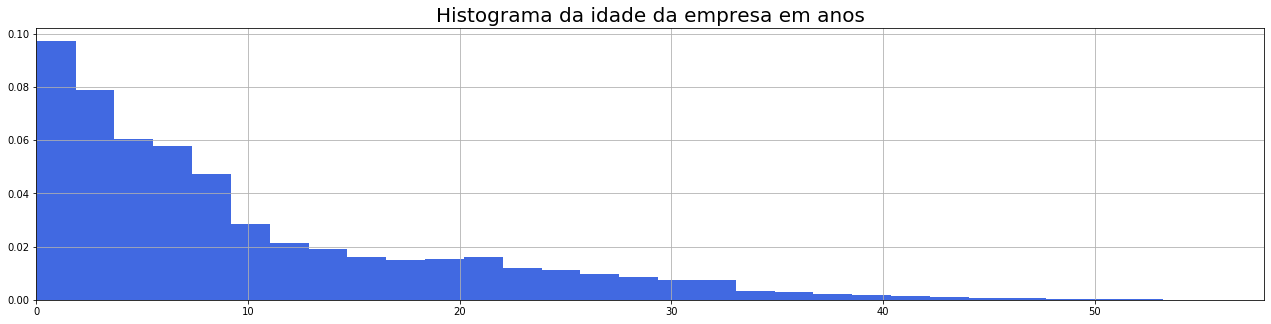

In [101]:
plt.figure(figsize=(22,5))
market['idade_empresa_anos'].hist(bins=58, color='royalblue', density=True)
plt.title('Histograma da idade da empresa em anos', fontsize=20)
plt.xlim(0,58)
plt.show()

In [26]:
# situação especial

market['fl_st_especial'].value_counts()

False    462230
True         68
Name: fl_st_especial, dtype: int64

In [27]:
# zona metropolitana

market['fl_rm'].value_counts()

NAO    236779
SIM    225519
Name: fl_rm, dtype: int64

In [28]:
market['fl_veiculo'].value_counts()

False    429687
True      30684
Name: fl_veiculo, dtype: int64

In [29]:
market['fl_optante_simples'].value_counts()

True     199617
False    179968
Name: fl_optante_simples, dtype: int64

In [30]:
market['fl_optante_simei'].value_counts()

False    285545
True      94040
Name: fl_optante_simei, dtype: int64

In [31]:
# Quantidade de construções. Pode transformar nans em 0

market['qt_art'].isnull().sum()

455708

In [32]:
market['vl_frota'].value_counts()

46918.0     214
43745.0     201
36782.0     152
41298.0     110
35579.0      90
           ... 
6424.0        1
205555.0      1
205554.0      1
25691.0       1
65536.0       1
Name: vl_frota, Length: 13833, dtype: int64

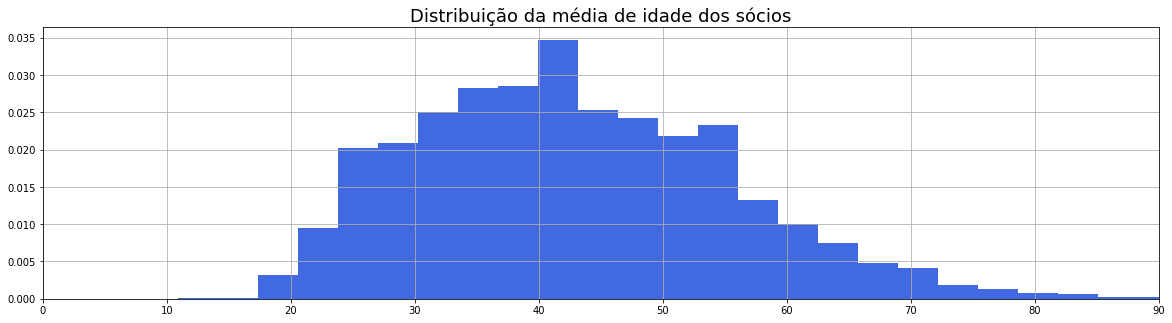

In [102]:
plt.figure(figsize=(20,5))
market['idade_media_socios'].hist(bins=40, color='royalblue', normed=True)
plt.title('Distribuição da média de idade dos sócios', fontsize=18)
plt.xlim(0,90)
plt.show()

In [34]:
(market['idade_media_socios'] < 0).sum()

1

In [35]:
market['idade_media_socios'].median()

42.0

In [36]:
# Podemos ver 
market['empsetorcensitariofaixarendapopulacao'].describe()

count    318469.000000
mean       1308.005725
std        1161.889222
min         100.000000
25%         673.230000
50%         946.680000
75%        1518.080000
max       75093.840000
Name: empsetorcensitariofaixarendapopulacao, dtype: float64

In [37]:
market['empsetorcensitariofaixarendapopulacao'].median()

946.68

In [38]:
# Censo de 2010 não apresentou nenhuma cidade com renda per capta maior que R$ 3.000,00. Porém o dicionário se refere a 'census unity', que pode ser algo menor que um município.

(market['empsetorcensitariofaixarendapopulacao'] > 3000).sum()

22984

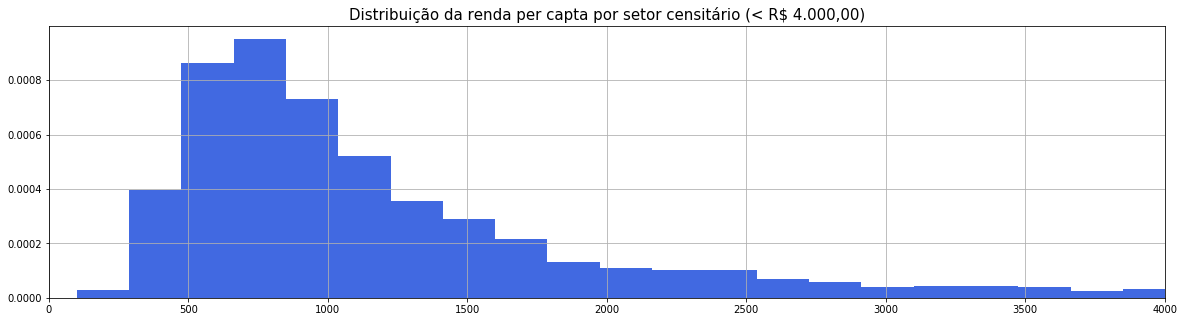

In [103]:
plt.figure(figsize=(20,5))
market['empsetorcensitariofaixarendapopulacao'].hist(bins=400, color='royalblue', normed=True)
plt.title('Distribuição da renda per capta por setor censitário (< R$ 4.000,00)', fontsize=15)
plt.xlim(0,4000)
plt.show()

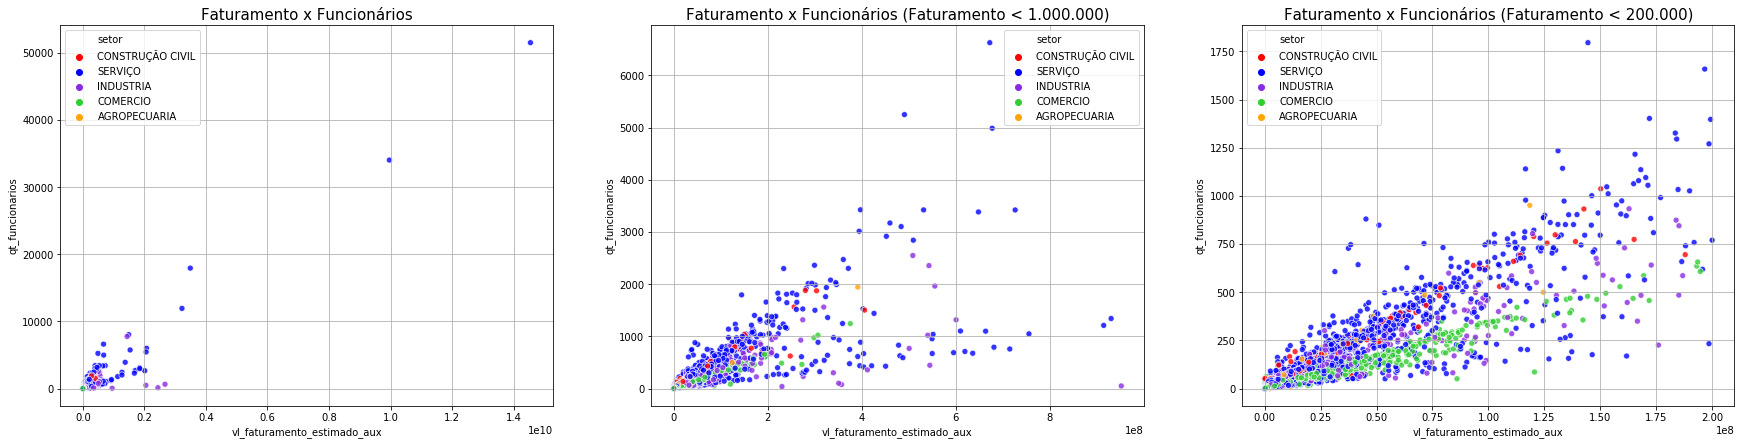

In [110]:
palette=['red', 'blue','blueviolet','limegreen','orange']
fig, ax = plt.subplots(ncols=3, figsize = (30,7))

sns.scatterplot(data=market, x='vl_faturamento_estimado_aux', y='qt_funcionarios',
                hue='setor', alpha=0.8, ax = ax[0], palette=palette)

sns.scatterplot(data=market[market['vl_faturamento_estimado_aux'] < 1e9],
                x='vl_faturamento_estimado_aux', y='qt_funcionarios',
                hue='setor', alpha=0.8, ax = ax[1], palette=palette)

sns.scatterplot(data=market[market['vl_faturamento_estimado_aux'] < 2e8],
                x='vl_faturamento_estimado_aux', y='qt_funcionarios',
                hue='setor', alpha=0.8, ax = ax[2], palette=palette)

ax[0].set_title('Faturamento x Funcionários',fontsize=15)
ax[1].set_title('Faturamento x Funcionários (Faturamento < 1.000.000)',fontsize=15)
ax[2].set_title('Faturamento x Funcionários (Faturamento < 200.000)',fontsize=15)
ax[0].grid()
ax[1].grid()
ax[2].grid()
sns.color_palette("bright", 10)
plt.show()

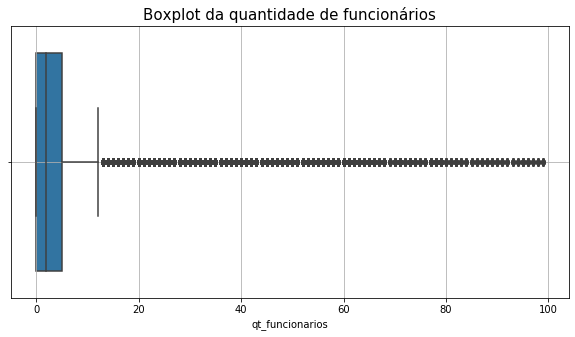

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(market.loc[market['qt_funcionarios'] < 100, 'qt_funcionarios'])
plt.title('Boxplot da quantidade de funcionários',fontsize=15)
plt.grid()
plt.show()

In [42]:
market['qt_funcionarios'].median()

2.0

In [43]:
market['qt_funcionarios'].describe()

count    103574.000000
mean         12.324570
std         222.456579
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max       51547.000000
Name: qt_funcionarios, dtype: float64

In [44]:
market['de_faixa_faturamento_estimado'].value_counts()

DE R$ 81.000,01 A R$ 360.000,00             273861
ATE R$ 81.000,00                             98558
DE R$ 360.000,01 A R$ 1.500.000,00           46225
DE R$ 1.500.000,01 A R$ 4.800.000,00         10153
DE R$ 4.800.000,01 A R$ 10.000.000,00         2150
DE R$ 10.000.000,01 A R$ 30.000.000,00        1445
SEM INFORMACAO                                1173
DE R$ 30.000.000,01 A R$ 100.000.000,00        871
DE R$ 100.000.000,01 A R$ 300.000.000,00       253
DE R$ 300.000.000,01 A R$ 500.000.000,00        48
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS        27
ACIMA DE 1 BILHAO DE REAIS                      21
Name: de_faixa_faturamento_estimado, dtype: int64

In [45]:
market['de_nivel_atividade'].value_counts()

MEDIA          217949
ALTA           152245
BAIXA           76080
MUITO BAIXA      4856
Name: de_nivel_atividade, dtype: int64

In [46]:
market['de_saude_tributaria'].value_counts()

VERDE       145430
AZUL        105230
AMARELO      91045
CINZA        64019
LARANJA      36116
VERMELHO      5607
Name: de_saude_tributaria, dtype: int64

In [47]:
market['de_saude_rescencia'].value_counts()

ACIMA DE 1 ANO    378896
ATE 1 ANO          38101
SEM INFORMACAO     30425
ATE 3 MESES           13
ATE 6 MESES           12
Name: de_saude_rescencia, dtype: int64

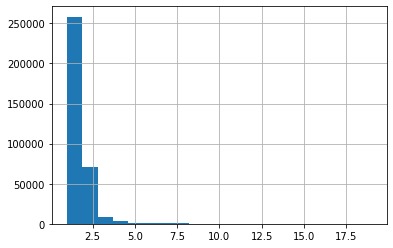

In [48]:
market.loc[market['qt_socios']< 20, 'qt_socios'].hist(bins=20)
plt.show()

In [49]:
# % de empresas com 1 sócio, sem contar os NaNs

len(market[market['qt_socios']==1])/len(market['qt_socios'].dropna())

0.7440892608731967

In [50]:
# Em empresas de 1 só sócio na maioria das vezes é PF

market.loc[market['qt_socios']==1,'qt_socios_pf'].value_counts()

1.0    258341
0.0        12
Name: qt_socios_pf, dtype: int64

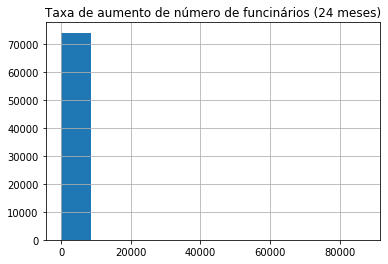

In [51]:
market['tx_crescimento_24meses'].hist(bins=10)
plt.title('Taxa de aumento de número de funcinários (24 meses)')
plt.show()

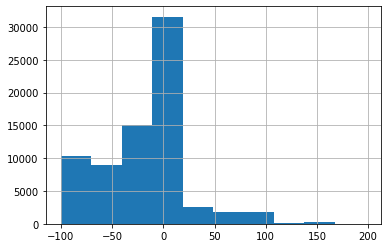

In [52]:
market.loc[market['tx_crescimento_24meses'] < 200, 'tx_crescimento_24meses'].hist()

In [53]:
market[market['tx_rotatividade'].notnull()].head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

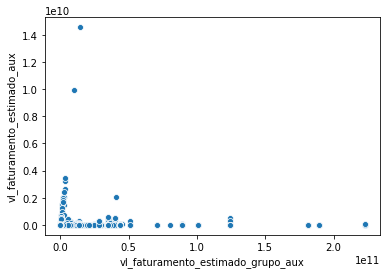

In [54]:
sns.scatterplot(data=market, x='vl_faturamento_estimado_grupo_aux',y='vl_faturamento_estimado_aux')

In [55]:
market['vl_faturamento_estimado_grupo_aux'].min()

41047.03

In [56]:
market[market['qt_art'] > 1000]

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
400037,7333516d37a69eadce7657f54c08ceb5024dd604dcbbd3...,True,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,7.989041,5 a 10,Fal